In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [23]:
su = pd.read_csv("/content/50_start_up.csv",encoding = 'latin2')
su

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [24]:
su.head(11)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [25]:
su.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [26]:
su.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [27]:
su.drop('State', axis=1, inplace=True)

In [28]:
su.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [29]:
su.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [30]:
su.isnull()

,R&D Spend,Administration,Marketing Spend,Profit
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [31]:
import statsmodels.formula.api as smf

In [32]:
su.rename(columns={'R&D Spend': 'RD_Spend', 'Marketing Spend': 'Marketing_Spend'}, inplace=True)
model = smf.ols("Profit~RD_Spend+Administration+Marketing_Spend", data = su).fit()
model

In [33]:
model.rsquared, model.rsquared_adj

(np.float64(0.9507459940683246), np.float64(0.9475337762901719))

In [34]:
model.tvalues, model.pvalues

(Intercept           7.626218
 RD_Spend           17.846374
 Administration     -0.525507
 Marketing_Spend     1.655077
 dtype: float64,
 Intercept          1.057379e-09
 RD_Spend           2.634968e-22
 Administration     6.017551e-01
 Marketing_Spend    1.047168e-01
 dtype: float64)

In [35]:
slr_c = smf.ols('Profit~Marketing_Spend',data=su).fit()
slr_c.tvalues , slr_c.pvalues


(Intercept          7.808356
 Marketing_Spend    7.802657
 dtype: float64,
 Intercept          4.294735e-10
 Marketing_Spend    4.381073e-10
 dtype: float64)

In [36]:
slr_c=smf.ols('Profit~RD_Spend',data=su).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    19.320288
 RD_Spend     29.151139
 dtype: float64,
 Intercept    2.782697e-24
 RD_Spend     3.500322e-32
 dtype: float64)

In [37]:
slr_c=smf.ols('Profit~Marketing_Spend+RD_Spend',data=su).fit()
slr_c.tvalues , slr_c.pvalues


(Intercept          17.463582
 Marketing_Spend     1.927052
 RD_Spend           19.265555
 dtype: float64,
 Intercept          3.504062e-22
 Marketing_Spend    6.003040e-02
 RD_Spend           6.040433e-24
 dtype: float64)

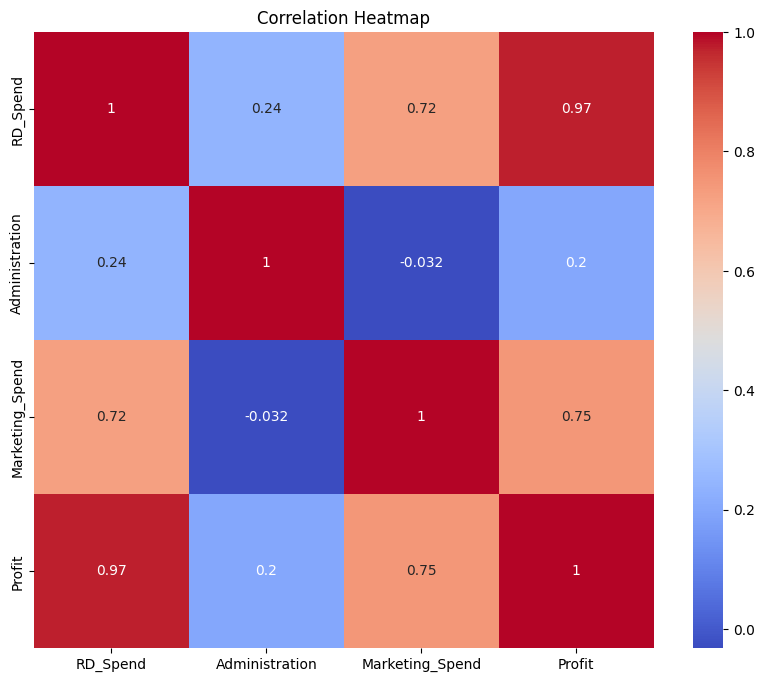

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(su.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()